<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/reports/%EA%B3%BC%EC%A0%9C_3_2_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. (50점) 교재 프로그램 7-1(강의 자료 MATLAB 코드)을 활용하여, K-means 군집화 알고 리즘을 수행해 보시오.

(1) (5점) (데이터 생성) 다음과 같은 평균과 공분산을 가지는 2차원 데이터를 클래스 당 100 개씩 생성하고, 이를 2차원 평면에 표시하시오(총 3개의 클래스 생성되며, 클래스별로 색 을 다르게 해서 plot할 것).

In [1]:
import numpy as np
np.random.seed(50)

$
\mu_1=\begin{pmatrix}
      0 \\ 4
      \end{pmatrix},
\mu_2=\begin{pmatrix}
      4 \\ 4
      \end{pmatrix},
\mu_3=\begin{pmatrix}
      2 \\ 0
      \end{pmatrix},
Σ_1=Σ_2=Σ_3=\begin{pmatrix}
      1 & 0 \\ 
      0 & 1
      \end{pmatrix}
$

In [2]:
mu_1 = np.array([0,4])
mu_2 = np.array([4,4])
mu_3 = np.array([2,0])

sigma_1 = sigma_2 = sigma_3 = np.array([[1,0],[0,1]])

row_count = 100
cluster_1 = np.random.randn(row_count, 2) @ np.sqrt(sigma_1) + mu_1
cluster_2 = np.random.randn(row_count, 2) @ np.sqrt(sigma_2) + mu_2
cluster_3 = np.random.randn(row_count, 2) @ np.sqrt(sigma_3) + mu_3
cluster_1.shape, cluster_2.shape, cluster_3.shape, 

((100, 2), (100, 2), (100, 2))

In [3]:
import matplotlib.pyplot as plt

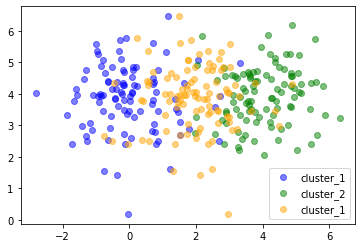

In [4]:
plt.scatter(cluster_1[:,0], cluster_1[:,1], color='blue', alpha=0.5, label='cluster_1')
plt.scatter(cluster_2[:,0], cluster_2[:,1], color='green', alpha=0.5, label='cluster_2')
plt.scatter(cluster_3[:,0], cluster_1[:,1], color='orange', alpha=0.5, label='cluster_1')
plt.legend()

(2) (10점) (1)에서 생성한 데이터의 각 클래스의 평균을 계산하고, 이를 2-(1)의 평면에 함께 표시하시오.

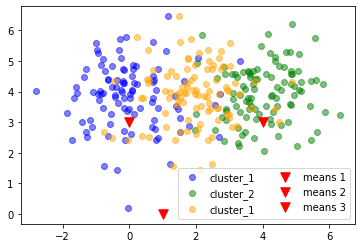

In [5]:
cluster_means = np.full([3,2], fill_value=0)
cluster_means[0] = np.mean(cluster_1, axis=0)
cluster_means[1] = np.mean(cluster_2, axis=0)
cluster_means[2] = np.mean(cluster_3, axis=0)
plt.scatter(cluster_1[:,0], cluster_1[:,1], color='blue', alpha=0.5, label='cluster_1')
plt.scatter(cluster_2[:,0], cluster_2[:,1], color='green', alpha=0.5, label='cluster_2')
plt.scatter(cluster_3[:,0], cluster_1[:,1], color='orange', alpha=0.5, label='cluster_1')
for idx in range(3):
  plt.scatter(cluster_means[idx,0], cluster_means[idx,1], marker='v', color='red', s=90, label='means {}'.format(idx+1))
plt.legend(ncol=2)
plt.show()

(3) (35점) (1)에서 생성한 데이터에 K-means 알고리즘(K=3으로 설정)을 적용하여 군집화를 수행하시오. 이때 알고리즘 반복횟수는 10으로 한정하고, 각 반복에 따른 군집 결과 및 군 집의 중심을 plot을 활용하여 출력하시오. 그리고 마지막 수행 결과 출력에서는 (2)에서 계산하였던 평균값도 함께 출력하여 군집화를 통해 획득한 군집의 중심과 실제 데이터가 가진 중심 간의 차이가 어떻게 나타나는지를 관찰하시오. (최종적으로 알고리즘이 몇 번 반복되었는지 언급하고, 각 반복 step마다 plot 해야 함)

In [6]:
# 대표 임의 생성
cluster_all = np.vstack([cluster_1, cluster_2, cluster_3])

indices = np.random.randint(cluster_all.shape[0], size=3)
print(indices)
means = cluster_all[indices, :]
means

[272  11 236]


array([[ 2.08324487,  0.43751487],
       [-0.41223445,  3.83928494],
       [ 1.12172643,  0.65997826]])

$
\begin{align} 
  J &= \sum_{n=1}^N \sum_{i=1}^N r_{ni} ||x_n - m_i||^2 \\
  r_{ni} &= \{ \begin{array}{c1}   
              1 & if & i=argmin_j || x_n - m_j ||^2 \\
              0 & otherwise
            \end{array}
\end{align}
$

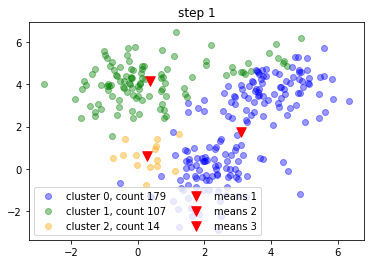

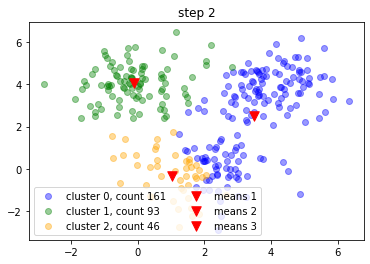

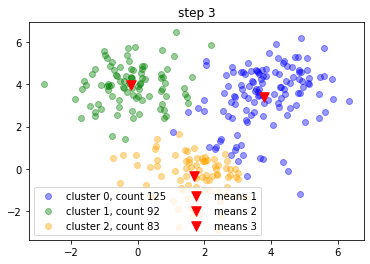

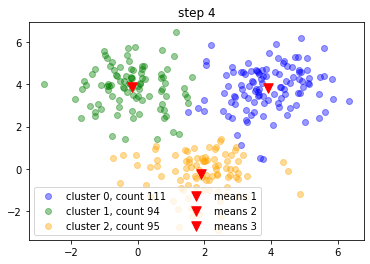

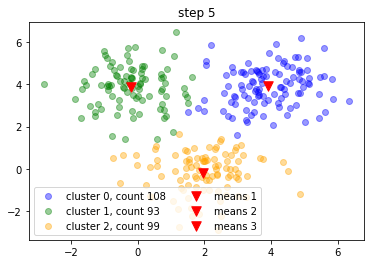

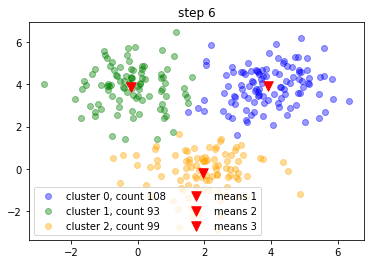

In [7]:
row_all_count = cluster_all.shape[0]
cmode = ["blue", "green", "orange"]
from scipy.spatial import distance as dstn

# 군집화 위해 반복 수행
kernel = 3
steps = 10
result_steps = 0

for iteration in range(steps):
    plt.figure(iteration+1)
    cluster_label = np.zeros((row_all_count))

    # 모든 데이터와 각 cluster 대표 벡터와 비교
    for i in range(row_all_count):
        distance_measure = np.full((kernel), fill_value=0)
        for j in range(kernel):
            distance = dstn.euclidean(cluster_all[i, :], means[j, :])
            distance_measure[j] = distance
        # 거리가 가장 가까운 데이터 확인
        cluster_label[i] = np.argmin(distance_measure)
    # 대표 벡터 재 계산 위해 복사
    past_means = means.copy()
    # 계산 전 대표 벡터들 그래프 표시
    for j in range(kernel):
        cluster_label_mask = (cluster_label == j)
        cluster_label_cnt = cluster_all[cluster_label_mask].shape[0]
        plt.scatter(cluster_all[cluster_label_mask, 0], cluster_all[cluster_label_mask, 1]
                     , alpha=0.4, label='cluster {}, count {}'.format(j,cluster_label_cnt), color=cmode[j])
        means[j,:] = np.mean(cluster_all[cluster_label_mask, :], axis=0)    # 새로운 벡터 계산
    # 계산 전 대표 벡터들 그래프 표시
    for idx in range(3):
      plt.scatter(means[idx,0], means[idx,1], marker='v', color='red', s=90, label='means {}'.format(idx))

    pass
    plt.title('step {}'.format(iteration+1))
    plt.legend(ncol=2)
    plt.show()

    # 평균 벡터 변화 없으면 정지
    result_steps = iteration
    if (np.array_equal(means, past_means)):
      break


In [10]:
# K-mean가 완료된 반복 횟수
print('반복 횟수 : {}'.format(result_steps))

반복 횟수 : 5


In [12]:
# K-mean 완료 시 평균값
print('K-mean 완료 시 평균값')
for idx in range(3):
  print('cluster {}번째 평균:{} vs K-mean 알고리즘 평균:{}'.format(idx,cluster_means[idx], means[idx]))

K-mean 완료 시 평균값
cluster 0번째 평균:[0 3] vs K-mean 알고리즘 평균:[3.91184178 3.89828074]
cluster 1번째 평균:[4 3] vs K-mean 알고리즘 평균:[-0.19293534  3.88985883]
cluster 2번째 평균:[1 0] vs K-mean 알고리즘 평균:[ 1.95532739 -0.19291463]
